# Import

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, \
                            median_absolute_error, r2_score, \
                            mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['Arial']

# Read data

In [2]:
df = pd.read_csv('HousingData.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Select feature

<Figure size 1440x720 with 0 Axes>

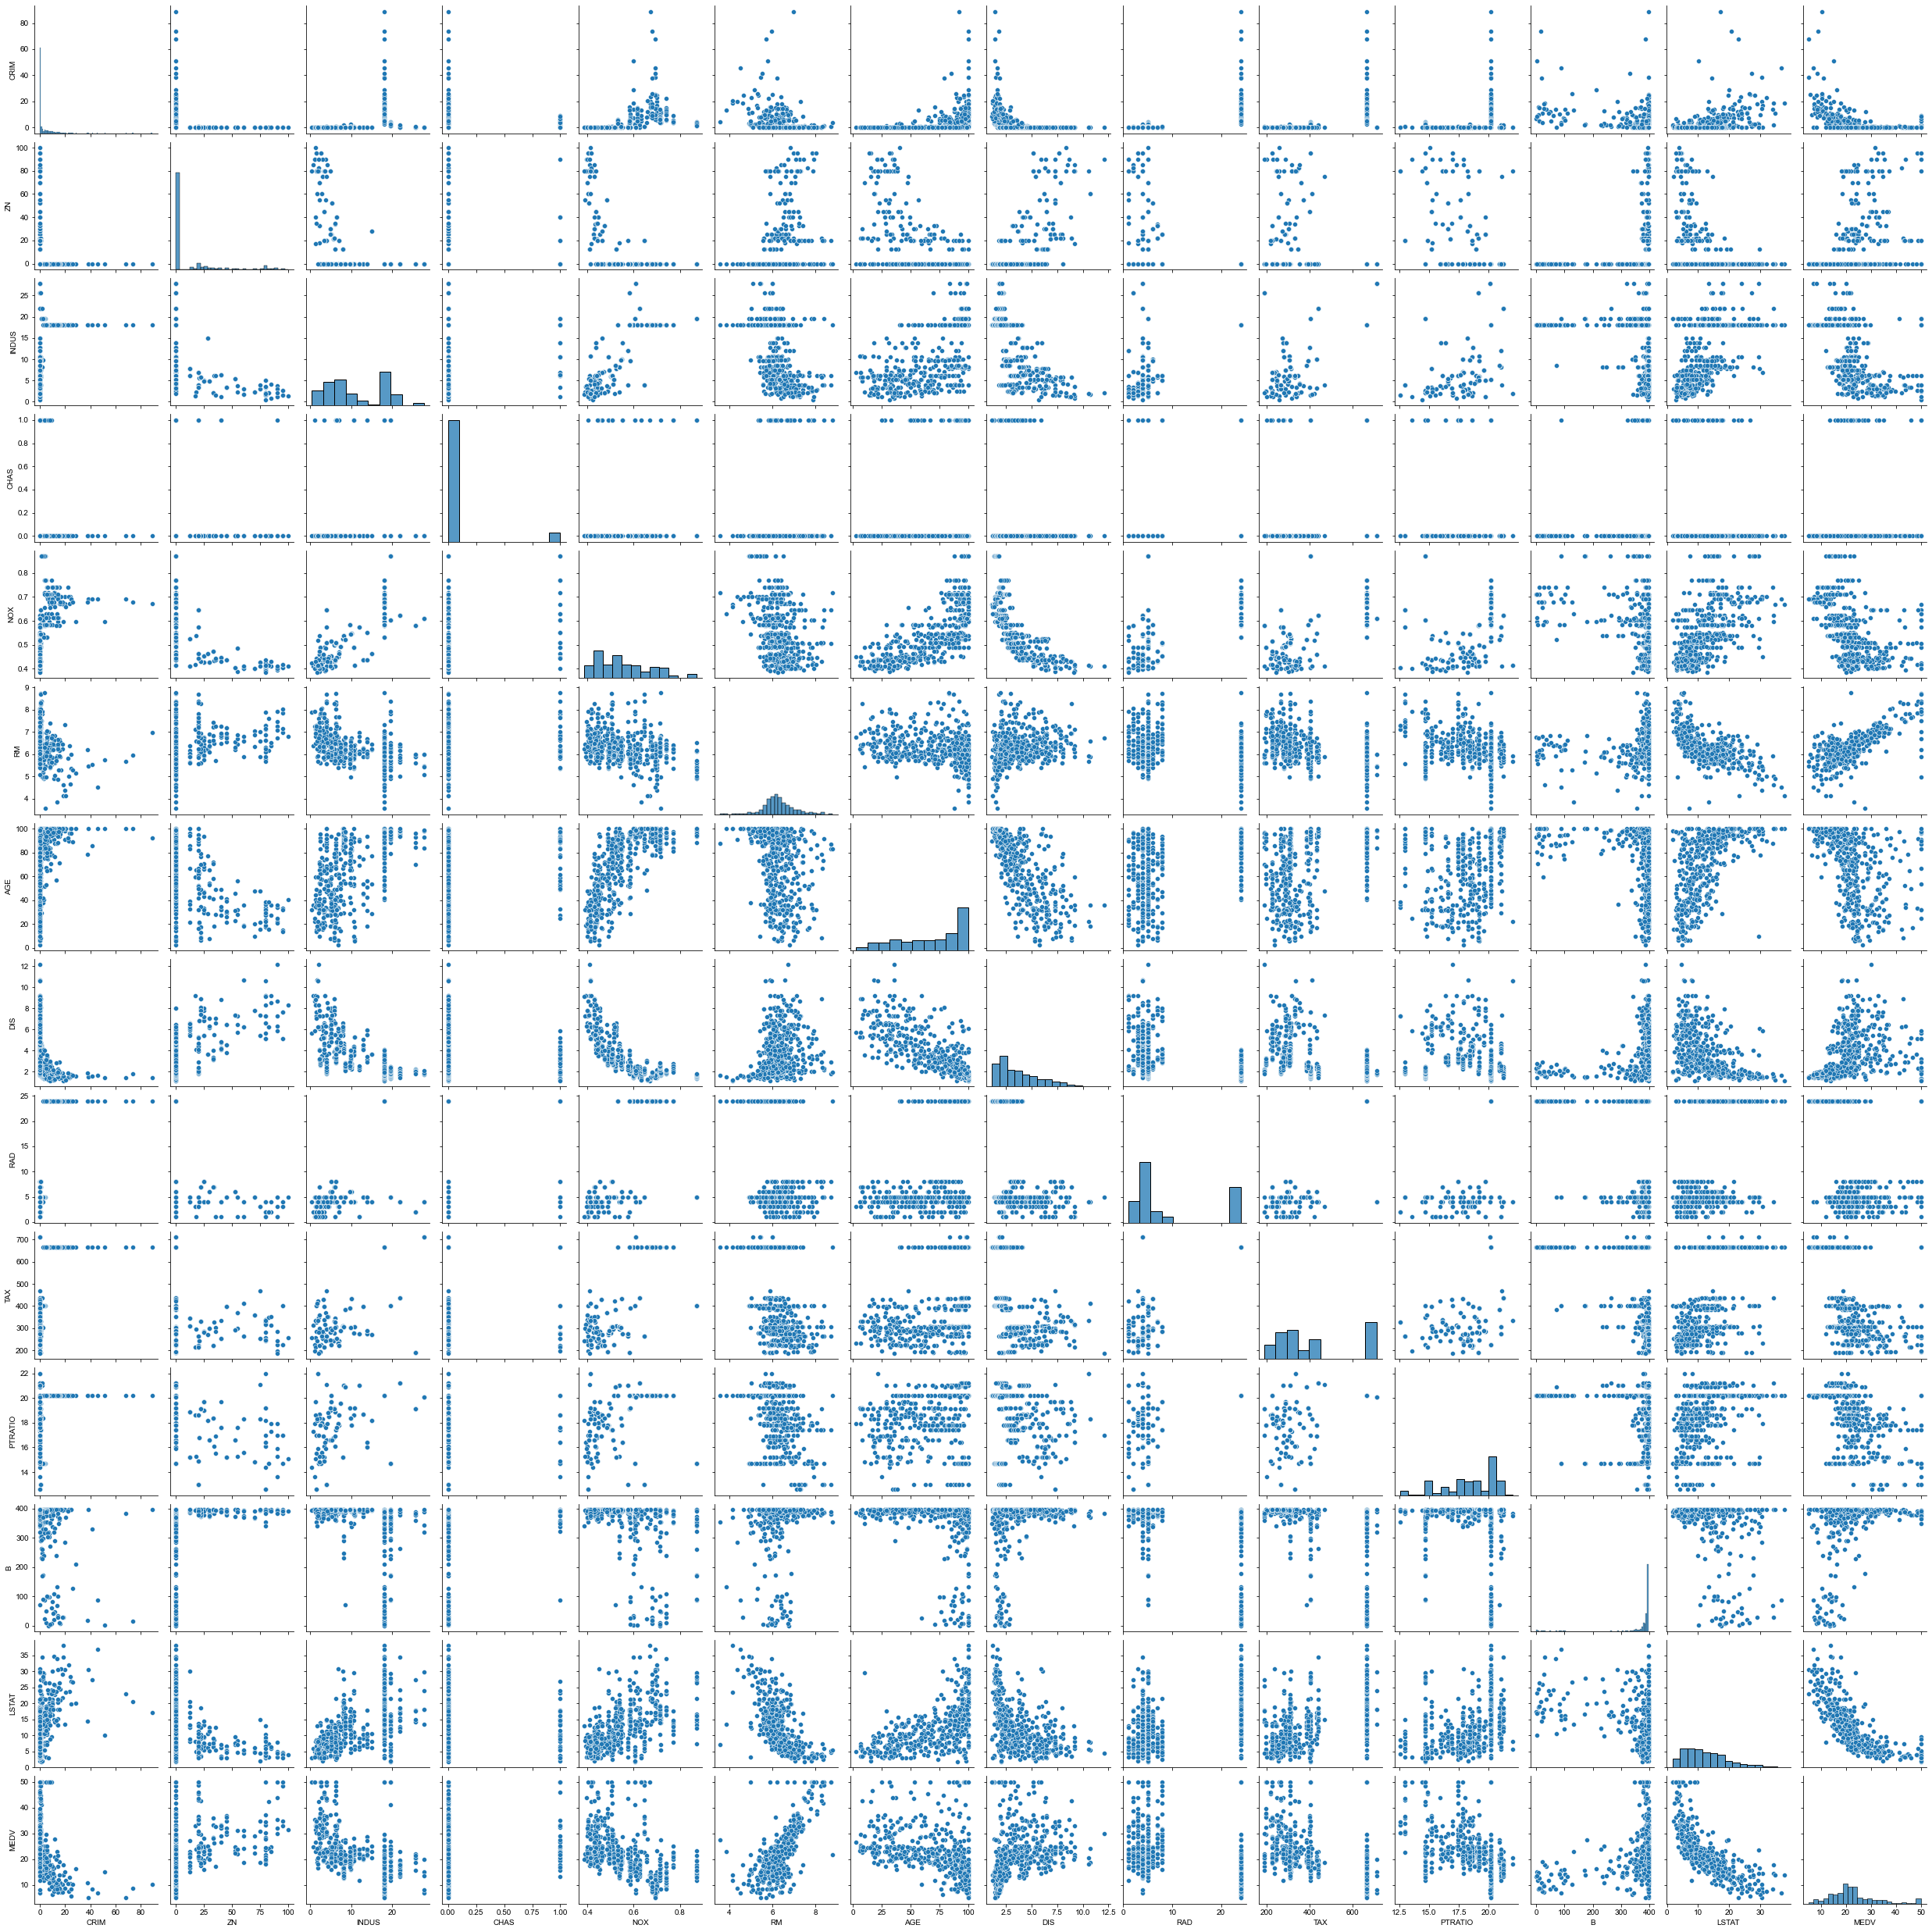

In [6]:
plt.figure(figsize=(20, 10))

sns.pairplot(df)

plt.xticks(rotation=45, fontsize=20)
plt.yticks(rotation=0, fontsize=20)
plt.show()

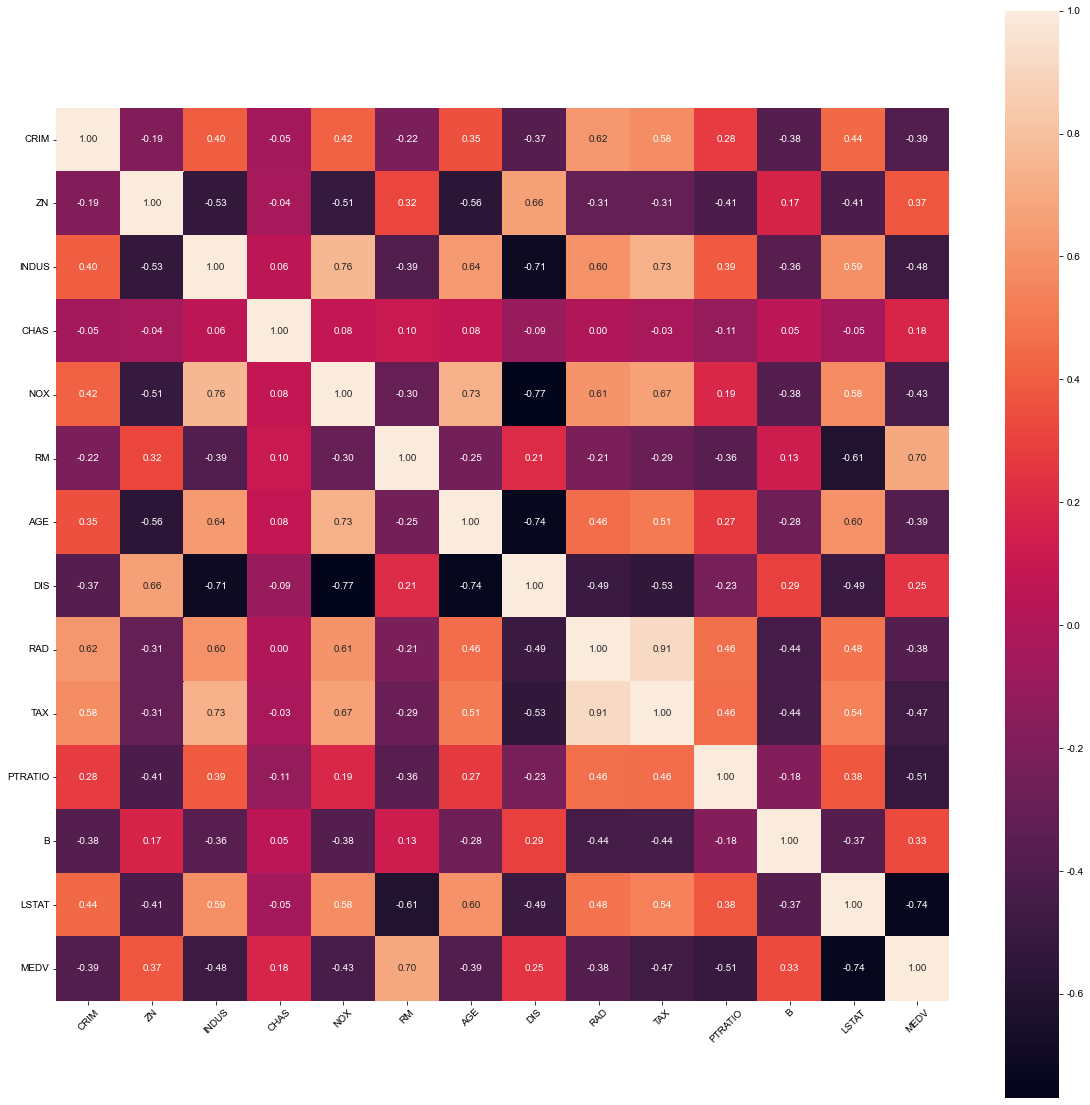

In [7]:
plt.figure(figsize=(20, 20))

sns.heatmap(df.corr(), 
            annot=True, 
            square=True, 
            fmt='.2f')

plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

選取與目標欄位（MEDV）有極高或極低相關係數之欄位，這邊選取LSTAT及RM做示範。

# Select one feature to trainning and evaluating
選取LSTAT欄位。

In [8]:
df_one_feature = df[['LSTAT']]
df_one_feature = df_one_feature.fillna(df_one_feature.mean())

In [9]:
one_feature = df_one_feature.values
target = df[['MEDV']].values

In [10]:
X_one_train, X_one_test, y_one_train, y_one_test = train_test_split(one_feature, target, 
                                                                    test_size=0.2, random_state=1)

In [11]:
lr_one = LinearRegression()
lr_one.fit(X_one_train, y_one_train)
y_one_pred = lr_one.predict(X_one_test)
print(lr_one.score(X_one_test, y_one_test))

0.5046399848937972


## 特徵工程
觀察各個欄位分佈圖可以發現LSTAT欄位呈現右偏，使用log讓特徵更接近標準常態分佈。

In [12]:
df_one_feature = df[['LSTAT']]
df_one_feature = df_one_feature.fillna(df_one_feature.mean())
df_one_feature = np.log(df_one_feature) # Normal distribution

In [13]:
one_feature = df_one_feature.values
target = df[['MEDV']].values

In [14]:
X_one_train, X_one_test, y_one_train, y_one_test = train_test_split(one_feature, target, 
                                                                    test_size=0.2, random_state=1)

In [15]:
lr_one = LinearRegression()
lr_one.fit(X_one_train, y_one_train)
y_one_pred = lr_one.predict(X_one_test)
print(lr_one.score(X_one_test, y_one_test))

0.6499035232073028


可以看到這邊的評估結果明顯比沒有取log時來得好，證明這時候對特徵取log是有助於模型效果提升的。

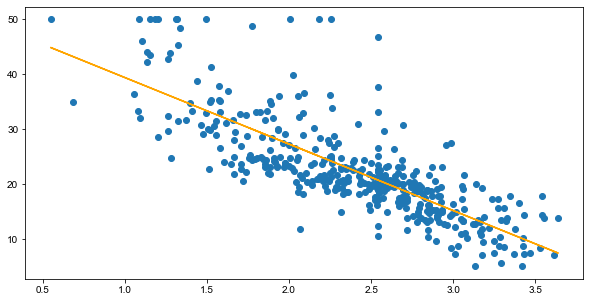

In [16]:
plt.figure(figsize=(10, 5))

plt.scatter(X_one_train, y_one_train)
plt.plot(X_one_train, lr_one.coef_[0]*X_one_train+lr_one.intercept_, color='orange')

plt.show()

In [17]:
print('Testing dataset evaluating')
print('MAE: ', round(mean_absolute_error(y_one_test, y_one_pred), 6))
print('MSE: ', round(mean_squared_error(y_one_test, y_one_pred), 6))
print('MDAE: ', round(median_absolute_error(y_one_test, y_one_pred), 6))
print('R2: ', round(r2_score(y_one_test, y_one_pred), 6))
print('MAPE: ', round(mean_absolute_percentage_error(y_one_test, y_one_pred), 6))

Testing dataset evaluating
MAE:  4.40396
MSE:  34.599121
MDAE:  3.1958
R2:  0.649904
MAPE:  0.208682


# Select two feature to trainning and evaluating
選取LSTAT以及RM欄位。

In [18]:
df_two_feature = df[['RM', 'LSTAT']]
df_two_feature = df_two_feature.fillna(df_two_feature.mean())
df_two_feature['LSTAT'] = np.log(df_two_feature['LSTAT']) # Normal distribution

In [19]:
two_feature = df_two_feature.values
target = df[['MEDV']].values

In [20]:
X_two_train, X_two_test, y_two_train, y_two_test = train_test_split(two_feature, target, 
                                                                    test_size=0.2, random_state=1)

In [21]:
lr_two = LinearRegression()
lr_two.fit(X_two_train, y_two_train)
y_two_pred = lr_two.predict(X_two_test)
print(lr_two.score(X_two_test, y_two_test))

0.7310704123752458


In [22]:
print('Testing dataset evaluating')
print('MAE: ', round(mean_absolute_error(y_two_test, y_two_pred), 6))
print('MSE: ', round(mean_squared_error(y_two_test, y_two_pred), 6))
print('MDAE: ', round(median_absolute_error(y_two_test, y_two_pred), 6))
print('R2: ', round(r2_score(y_two_test, y_two_pred), 6))
print('MAPE: ', round(mean_absolute_percentage_error(y_two_test, y_two_pred), 6))

Testing dataset evaluating
MAE:  4.097586
MSE:  26.577609
MDAE:  3.448209
R2:  0.73107
MAPE:  0.212481


# Predict
使用MAE及MSE都較小之lr_two模型進行預測。

In [23]:
test_house = pd.DataFrame([[6.674, 11.69], [7.249, 30.81]], columns=['RM', 'LSTAT'])

In [24]:
test_house

,RM,LSTAT
0,6.674,11.69
1,7.249,30.81


In [25]:
test_house['LSTAT'] = np.log(test_house['LSTAT'])

In [26]:
pred_test_house = lr_two.predict(test_house.values)

In [27]:
print(f'The predicted price of House A is {round(pred_test_house[0][0], 4)}')
print(f'The predicted price of House B is {round(pred_test_house[1][0], 4)}')

The predicted price of House A is 23.4042
The predicted price of House B is 16.4516
